In [1]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np

import scipy.special as sp
from scipy import integrate

from sklearn import metrics

from scipy.stats import multivariate_normal

from scipy.stats import shapiro
from scipy.stats import anderson

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.mixture import BayesianGaussianMixture

from sklearn import naive_bayes

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif


from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_predict



In [2]:
def asy1(estimator, X, y):
    Penalty_1 = np.array([[-10,10], [1,0]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_1[y, answ])
    
def asy2(estimator, X, y):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    answ = np.int64(estimator.predict(X))
    return np.sum(Penalty_2[y, answ])

def num(estimator, X, y):
    answ = np.int64(estimator.predict(X))
    return np.sum(np.abs(answ - y) > 0)

def _num(y1, y2):
    return np.sum(np.abs(y1 - y2) > 0)

def _acc(y1, y2):
    return np.sum(y1 == y2)

def _asy1(y1, y2):
    Penalty_1 = np.array([[-10,10], [1,0]])
    return np.sum(Penalty_1[y1, y2])

def _asy2(y1, y2):
    Penalty_2 = np.array([[-1,2], [1,-1]])
    return np.sum(Penalty_2[y1, y2])

In [3]:
def comp(X, lower, upper):
    outliers = []
    for i in range(X.shape[0]):
        if np.sum(X[i] < lower) + np.sum(X[i] > upper) > 0:
            outliers.append(i)
    return outliers
 
def check_outliers(X):
    q25 = X.quantile(0.25, axis=0)
    q75 = X.quantile(0.75, axis=0)
    iqr = q75 - q25
    cut_off = iqr * 1.75
    lower, upper = q25 - cut_off, q75 + cut_off
    outliers = comp(X.values, lower, upper)
    return outliers

In [4]:
np.random.seed(0)

In [5]:
X_train_load = pd.read_csv('./data/task1_4_learn_X.csv',header=None, sep=' ').as_matrix()
y_train_load = np.reshape(np.int64(pd.read_csv('./data/task1_4_learn_y.csv',header=None, sep=' ').as_matrix()), -1)

X_test_load = pd.read_csv('./data/task1_4_test_X.csv',header=None, sep=' ').as_matrix()

In [6]:
# for i in range(X_train_load.shape[1]):
#     print(anderson(X_train_load[np.where(y_train_load==1)][:,i])[0], anderson(X_train_load[np.where(y_train_load==0)][:,i])[0])

In [7]:
print(X_train_load.shape)
print(y_train_load.shape)
print(X_test_load.shape)

(1000, 200)
(1000,)
(10000, 200)


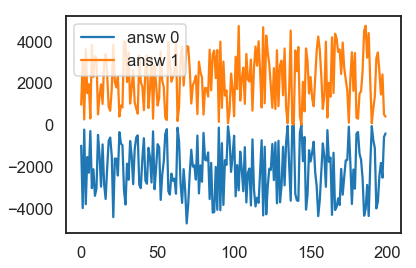

In [8]:
plt.plot(np.mean(X_train_load[np.where(y_train_load==0)], axis = 0), label = 'answ 0')
plt.plot(np.mean(X_train_load[np.where(y_train_load==1)], axis = 0), label = 'answ 1')

plt.legend(loc='best')

plt.savefig('Practise_4_FeatureMean.pdf')

In [9]:
skb = SelectKBest(f_classif, k=1)
# skb = SelectKBest(mutual_info_classif, k=1)
skb.fit(X_train_load, y_train_load)

SelectKBest(k=1, score_func=<function f_classif at 0x11440b378>)

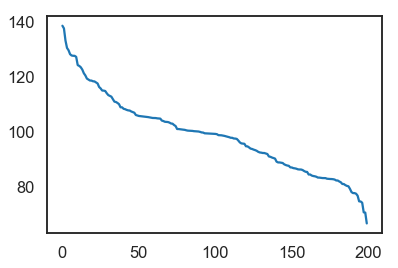

In [10]:
plt.plot(np.sort(skb.scores_)[::-1])

In [11]:
np.sort(skb.scores_)[::-1][:40]

array([ 138.3669169 ,  137.40148241,  133.01343651,  130.34179406,
        129.49648911,  128.07562175,  127.59806008,  127.49313349,
        127.47185781,  127.10035578,  124.12082605,  123.82650608,
        123.34207325,  122.49217718,  121.175235  ,  120.37795385,
        119.24182315,  118.89429356,  118.53942303,  118.5104421 ,
        118.26656086,  118.20448247,  117.855826  ,  117.47300225,
        116.19756155,  115.66598512,  114.90954715,  114.88045968,
        114.73460378,  113.91767928,  113.25713279,  112.95478029,
        112.69538298,  111.77781615,  110.8917098 ,  110.76009499,
        110.41620832,  109.97936667,  108.84643251,  108.83540592])

In [12]:
skb.k = 140

In [13]:
X = skb.transform(scale(np.vstack([X_train_load, X_test_load])))
# X = skb.transform(np.vstack([X_train_load, X_test_load]))
# X = (X - np.mean(X, axis=0))/np.std(X, axis=0)

X_train = X[:X_train_load.shape[0]]
X_test = X[X_train_load.shape[0]:]

y_train = np.array(y_train_load)



In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1000, 140)
(1000,)
(10000, 140)


In [15]:
print(_asy1(y_train, y_train), _asy2(y_train, y_train))
print(np.sum(y_train))

-5210 -1000
479


In [16]:
print(np.mean(np.sum(X_train[np.where(y_train==1)], axis = 1)))
print(np.mean(np.sum(X_train[np.where(y_train==0)], axis = 1)))

42.5460554943
-43.8016354846


In [17]:
print(np.sum(X_train[np.where(y_train==0)], axis = 1).shape)

(521,)


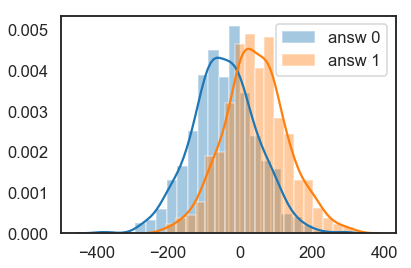

In [18]:
sns.distplot(np.sum(X_train[np.where(y_train==0)], axis = 1), label = 'answ 0')
sns.distplot(np.sum(X_train[np.where(y_train==1)], axis = 1), label = 'answ 1')

plt.legend(loc='best')
plt.savefig('Practise_4_Statistic.pdf')

In [19]:
X_train_new = np.reshape(np.sum(X_train, axis = 1), [-1,1])
X_test_new = np.reshape(np.sum(X_test, axis = 1), [-1,1])
y_train_new = np.array(y_train)

In [20]:
rho = 0.5
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_AUC = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)
Predict_For_NUM = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)




ACC 0.693
AUC 0.754575070424
NUM 307
ASY1 -2129
ASY2 -240


In [21]:
rho = 0.9
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_ASY1 = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)




ACC 0.532
AUC 0.754575070424
NUM 468
ASY1 -4723
ASY2 -63


In [22]:
rho = 0.63
Predict = cross_val_predict(estimator=naive_bayes.GaussianNB(), X=X_train_new, y=y_train_new, cv = 10, method='predict_proba')


print('ACC', metrics.accuracy_score(y_train_new, np.int64(Predict[:,1]>rho)))
print('AUC', metrics.roc_auc_score(y_train_new, Predict[:,1]))
print('NUM', _num(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY1', _asy1(y_train_new, np.int64(Predict[:,1]>rho)))
print('ASY2', _asy2(y_train_new, np.int64(Predict[:,1]>rho)))

Predict_For_ASY2 = naive_bayes.GaussianNB().fit(X_train_new, y_train_new).predict(X_test_new)




ACC 0.66
AUC 0.754575070424
NUM 340
ASY1 -3540
ASY2 -250


In [23]:
pd.DataFrame(np.vstack([Predict_For_AUC, Predict_For_NUM, Predict_For_ASY1, Predict_For_ASY2]).T).to_csv('task1_4_answ.csv', sep = ',')
